In [1]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    
import numpy as np
import scipy.stats as stats

# %matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def quadratic_func(observation, action, R1_diag=[1, 10, 1, 0, 0], **kwargs):
    R1 = np.diag(np.array(R1_diag))
    chi = np.concatenate([observation, action])
    cost = chi.T @ R1 @ chi
    return cost

def biquadratic_func(observation, action, R1_diag=[1, 10, 1, 0, 0], R2_diag=[1, 10, 1, 0, 0], **kwargs):
    R1 = np.diag(np.array(R1_diag))
    R2 = np.diag(np.array(R2_diag))
    chi = np.concatenate([observation, action])
    cost_2nd_order = chi.T @ R1 @ chi
    cost_4th_order = np.square(chi.T) @ R2 @ np.square(chi)
    cost = cost_4th_order + cost_2nd_order

    return cost

In [3]:
u = np.array([1, 1])
# sigma = np.diag([1, 1])
sigma = np.array([
    [1, 0],
    [0, 1]
])
rv = stats.multivariate_normal(u.flatten(), sigma)
noisy_u = np.vstack(rv.rvs())

In [4]:
def create_obstacle_map(rv, x_lim, y_lim, bi=True, **kwargs):
    X = np.arange(x_lim[0], x_lim[1], 0.25)
    Y = np.arange(y_lim[0], y_lim[1], 0.25)

    X, Y = np.meshgrid(X, Y)
    mesh = np.array([X, Y]).transpose((1, 2, 0))
    if bi:
        scale = int(kwargs.get("obstacle_gain", 30000))
        Z = rv.pdf(mesh) * scale
    else:
        scale = int(kwargs.get("obstacle_gain", 1000))
        Z = rv.pdf(mesh) * scale

    for x in range(mesh.shape[0]):
        for y in range(mesh.shape[1]):
            if bi:
                Z[x, y] += biquadratic_func([*mesh[x, y], 0], [0, 0], **kwargs)
            else:
                Z[x, y] += quadratic_func([*mesh[x, y], 0], [0, 0], **kwargs)

    return X, Y, Z

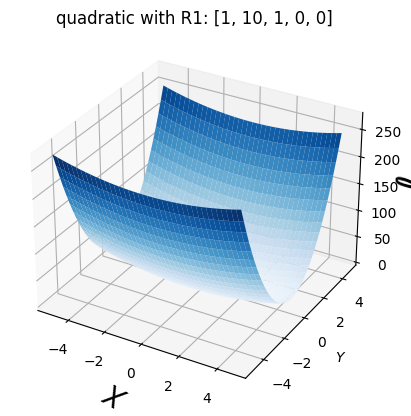

In [5]:
def plot_3d_potential_map(lost_function, R1_diag, R2_diag=[1, 10, 1, 0 ,0], **kwargs):
    X, Y, Z = create_obstacle_map(rv, [-5, 5], [-5, 5],
                                R1_diag=R1_diag,
                                R2_diag=R2_diag,
                                bi=lost_function!="quad",
                                **kwargs)
    # Plot the surface
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

    ax.set_xlabel('$X$', fontsize=20, rotation=150)
    ax.set_ylabel('$Y$')
    ax.set_zlabel(r'$\ell$', fontsize=30, rotation=60)
    ax.set_title("{} with R1: {}{}".format(
        "quadratic" if lost_function == "quad" else "biquadratic",
        R1_diag,
        f"- R2: {R2_diag}" if lost_function != "quad" else "",
    ))

    show_obs = int(kwargs.get("obstacle_gain") != 0)
    fig.savefig(f"./media/{lost_function}_{R1_diag}_{R2_diag}_obstacle_{show_obs}.svg")

plot_3d_potential_map("quad", [1, 10, 1, 0 ,0], obstacle_gain=0)

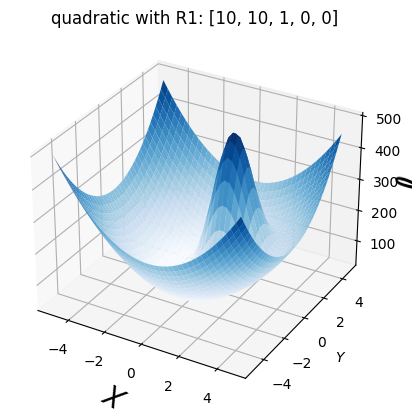

In [6]:
plot_3d_potential_map("quad", [10, 10, 1, 0 ,0], obstacle_gain=3000)

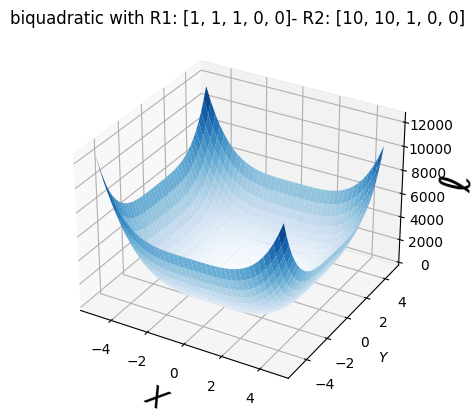

In [7]:
plot_3d_potential_map("biquad", [1, 1, 1, 0 ,0], [10, 10, 1, 0 ,0], obstacle_gain=0)

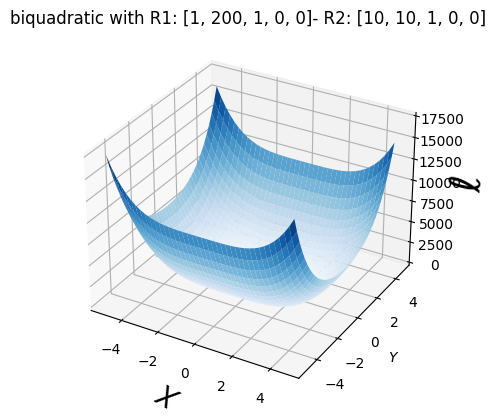

In [8]:
plot_3d_potential_map("biquad", [1, 200, 1, 0 ,0], [10, 10, 1, 0 ,0], obstacle_gain=0)

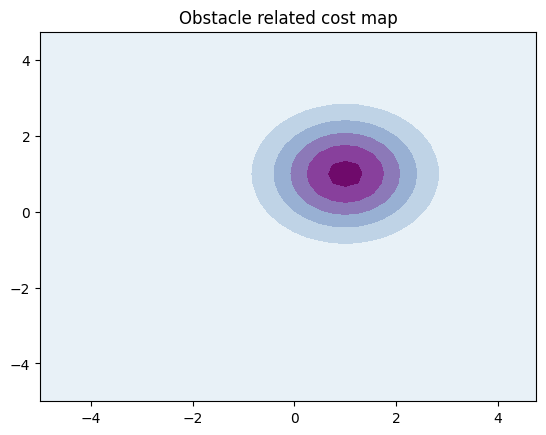

In [12]:
fig, ax = plt.subplots()
x_lim = y_lim = [-5, 5]
X = np.arange(x_lim[0], x_lim[1], 0.25)
Y = np.arange(y_lim[0], y_lim[1], 0.25)

X, Y = np.meshgrid(X, Y)
mesh = np.array([X, Y]).transpose((1, 2, 0))
Z = rv.pdf(mesh)
cs = ax.contourf(X, Y, Z, alpha=1, levels=5, cmap="BuPu")
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()
ax.set_title("Obstacle related cost map")
fig.savefig("./media/obstacle_generation.svg")

In [10]:
import matplotlib as mpl

[print(i) for i in mpl.colormaps.keys()]

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cubehelix_r
flag_r
gist_earth_r
g

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,